In [3]:
import os
import pandas as pd
import plotly.express as px
from PIL import Image
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt 

In [4]:
root_directory = os.getcwd()
directories = []
for dir_name in os.listdir(root_directory):
    dir_path = os.path.join(root_directory, dir_name)
    if os.path.isdir(dir_path):
        for split in ['train', 'validation', 'test']:
            split_path = os.path.join(dir_path, split)
            if os.path.isdir(split_path):
                fake_path = os.path.join(split_path, 'fake')
                real_path = os.path.join(split_path, 'real')
                if os.path.isdir(fake_path) and os.path.isdir(real_path):
                    directories.append((dir_path, split_path, fake_path, real_path))

print(directories)


[('e:\\dataset-deeplearning\\dataset1', 'e:\\dataset-deeplearning\\dataset1\\train', 'e:\\dataset-deeplearning\\dataset1\\train\\fake', 'e:\\dataset-deeplearning\\dataset1\\train\\real'), ('e:\\dataset-deeplearning\\dataset1', 'e:\\dataset-deeplearning\\dataset1\\validation', 'e:\\dataset-deeplearning\\dataset1\\validation\\fake', 'e:\\dataset-deeplearning\\dataset1\\validation\\real'), ('e:\\dataset-deeplearning\\dataset1', 'e:\\dataset-deeplearning\\dataset1\\test', 'e:\\dataset-deeplearning\\dataset1\\test\\fake', 'e:\\dataset-deeplearning\\dataset1\\test\\real'), ('e:\\dataset-deeplearning\\dataset2', 'e:\\dataset-deeplearning\\dataset2\\train', 'e:\\dataset-deeplearning\\dataset2\\train\\fake', 'e:\\dataset-deeplearning\\dataset2\\train\\real'), ('e:\\dataset-deeplearning\\dataset2', 'e:\\dataset-deeplearning\\dataset2\\validation', 'e:\\dataset-deeplearning\\dataset2\\validation\\fake', 'e:\\dataset-deeplearning\\dataset2\\validation\\real'), ('e:\\dataset-deeplearning\\dataset2'

In [5]:
data = []
color_distributions_real = []
color_distributions_fake = []

for dir_path, split_path, fake_path, real_path in directories:
    for class_name, class_path in [('fake', fake_path), ('real', real_path)]:
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(class_path, filename)
                with Image.open(path) as img:
                    width, height = img.size
                    color_mode = img.mode
                    file_size = os.path.getsize(path) / 1024  # Tamaño en KB
                    if class_name == 'real':
                        np_img = np.array(img)
                        color_distribution_r = np.bincount(np_img.flatten(), minlength=256)
                        color_distributions_real.append(color_distribution_r)
                    else:
                        np_img = np.array(img)
                        color_distribution_f = np.bincount(np_img.flatten(), minlength=256)
                        color_distributions_fake.append(color_distribution_f)

                    data.append((dir_path, split_path, class_name, filename, width, height, color_mode, file_size))

df = pd.DataFrame(data, columns=['Directory', 'Split', 'Class', 'Filename', 'Width', 'Height', 'Color_Mode', 'File_Size_KB'])
df["File_Size_MB"] = df["File_Size_KB"] / 1024 

In [4]:
df

,Directory,Split,Class,Filename,Width,Height,Color_Mode,File_Size_KB,File_Size_MB
0,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,fake,fake_55.jpg,256,256,RGB,7.629883,0.007451
1,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,fake,fake_550.jpg,256,256,RGB,8.308594,0.008114
2,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,fake,fake_551.jpg,256,256,RGB,8.042969,0.007854
3,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,fake,fake_552.jpg,256,256,RGB,8.450195,0.008252
4,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,fake,fake_553.jpg,256,256,RGB,12.901367,0.012599
...,...,...,...,...,...,...,...,...,...
2395,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,real,real_31.jpg,256,256,RGB,10.393555,0.010150
2396,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,real,real_32.jpg,256,256,RGB,8.393555,0.008197
2397,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,real,real_33.jpg,256,256,RGB,10.106445,0.009870
2398,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,c:\Users\basti\OneDrive\Escritorio\dataset\dat...,real,real_34.jpg,256,256,RGB,10.734375,0.010483


In [11]:
df["Color_Mode"].unique()

array(['RGB'], dtype=object)

C:\Users\basti\AppData\Local\Temp\ipykernel_6012\2311207064.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '134.1805419921875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'Average_R'] = np.mean(np_img[:, :, 0])
C:\Users\basti\AppData\Local\Temp\ipykernel_6012\2311207064.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '94.1552734375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'Average_G'] = np.mean(np_img[:, :, 1])
C:\Users\basti\AppData\Local\Temp\ipykernel_6012\2311207064.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '90.26011657714844' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'Average_B'] = np.

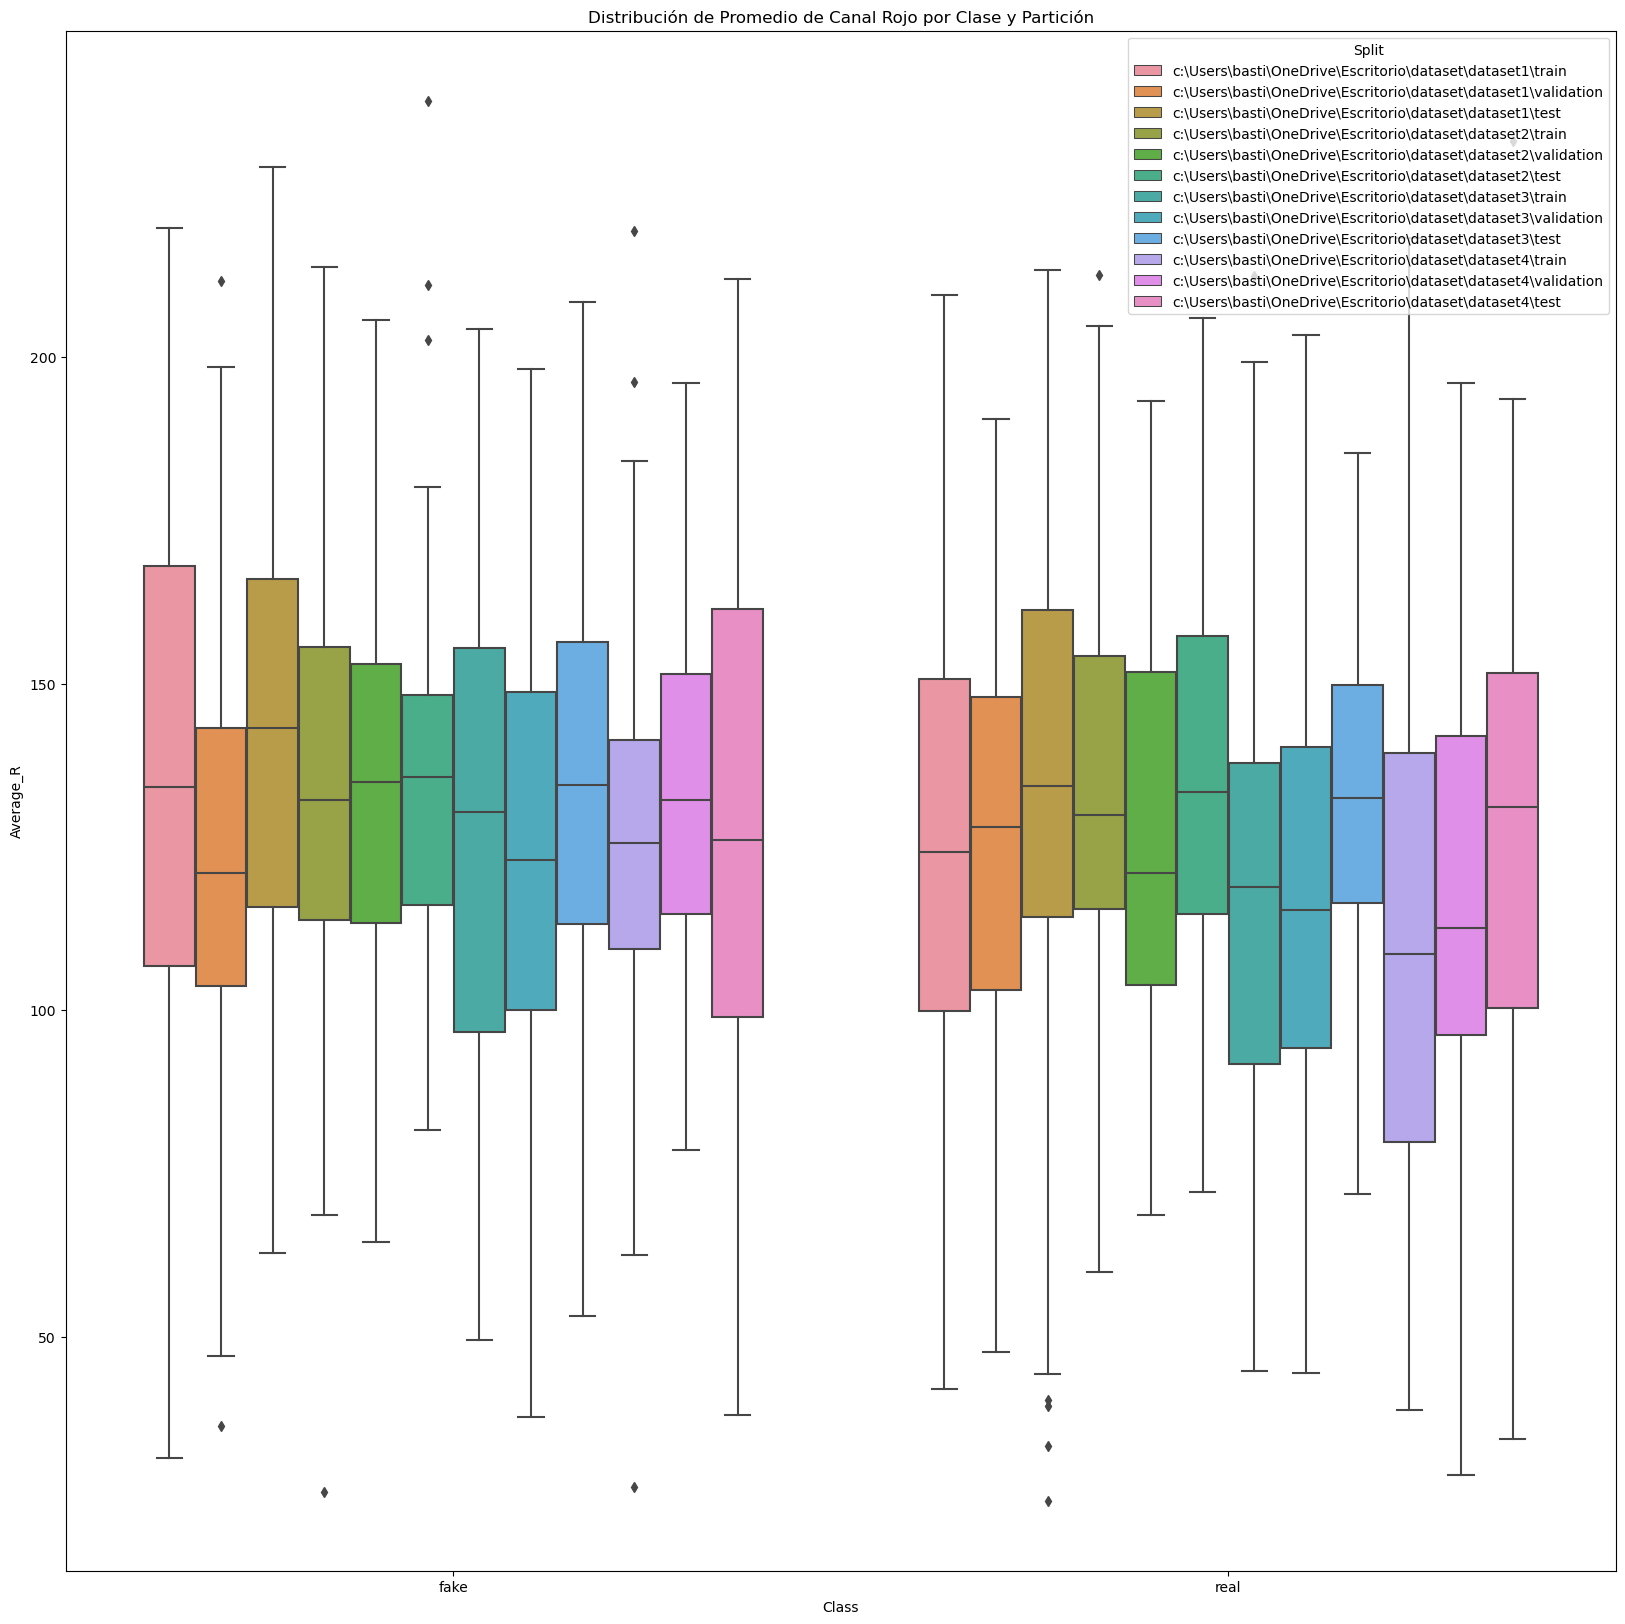

In [14]:
# Calcular promedio de color por clase y partición
def calculate_color_intensity(df):
    df['Average_R'] = 0
    df['Average_G'] = 0
    df['Average_B'] = 0
    for i, row in df.iterrows():
        img_path = os.path.join(row['Directory'], row['Split'], row['Class'], row['Filename'])
        img = Image.open(img_path).convert('RGB')
        np_img = np.array(img)
        df.at[i, 'Average_R'] = np.mean(np_img[:, :, 0])
        df.at[i, 'Average_G'] = np.mean(np_img[:, :, 1])
        df.at[i, 'Average_B'] = np.mean(np_img[:, :, 2])
    return df

df2 = calculate_color_intensity(df)
plt.figure(figsize=(20, 20)) 
sns.boxplot(x='Class', y='Average_R', hue='Split', data=df2)
plt.title("Distribución de Promedio de Canal Rojo por Clase y Partición")
plt.show()


c:\Users\basti\miniconda3\envs\entorno\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\basti\miniconda3\envs\entorno\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\basti\miniconda3\envs\entorno\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\basti\miniconda3\envs\entorno\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

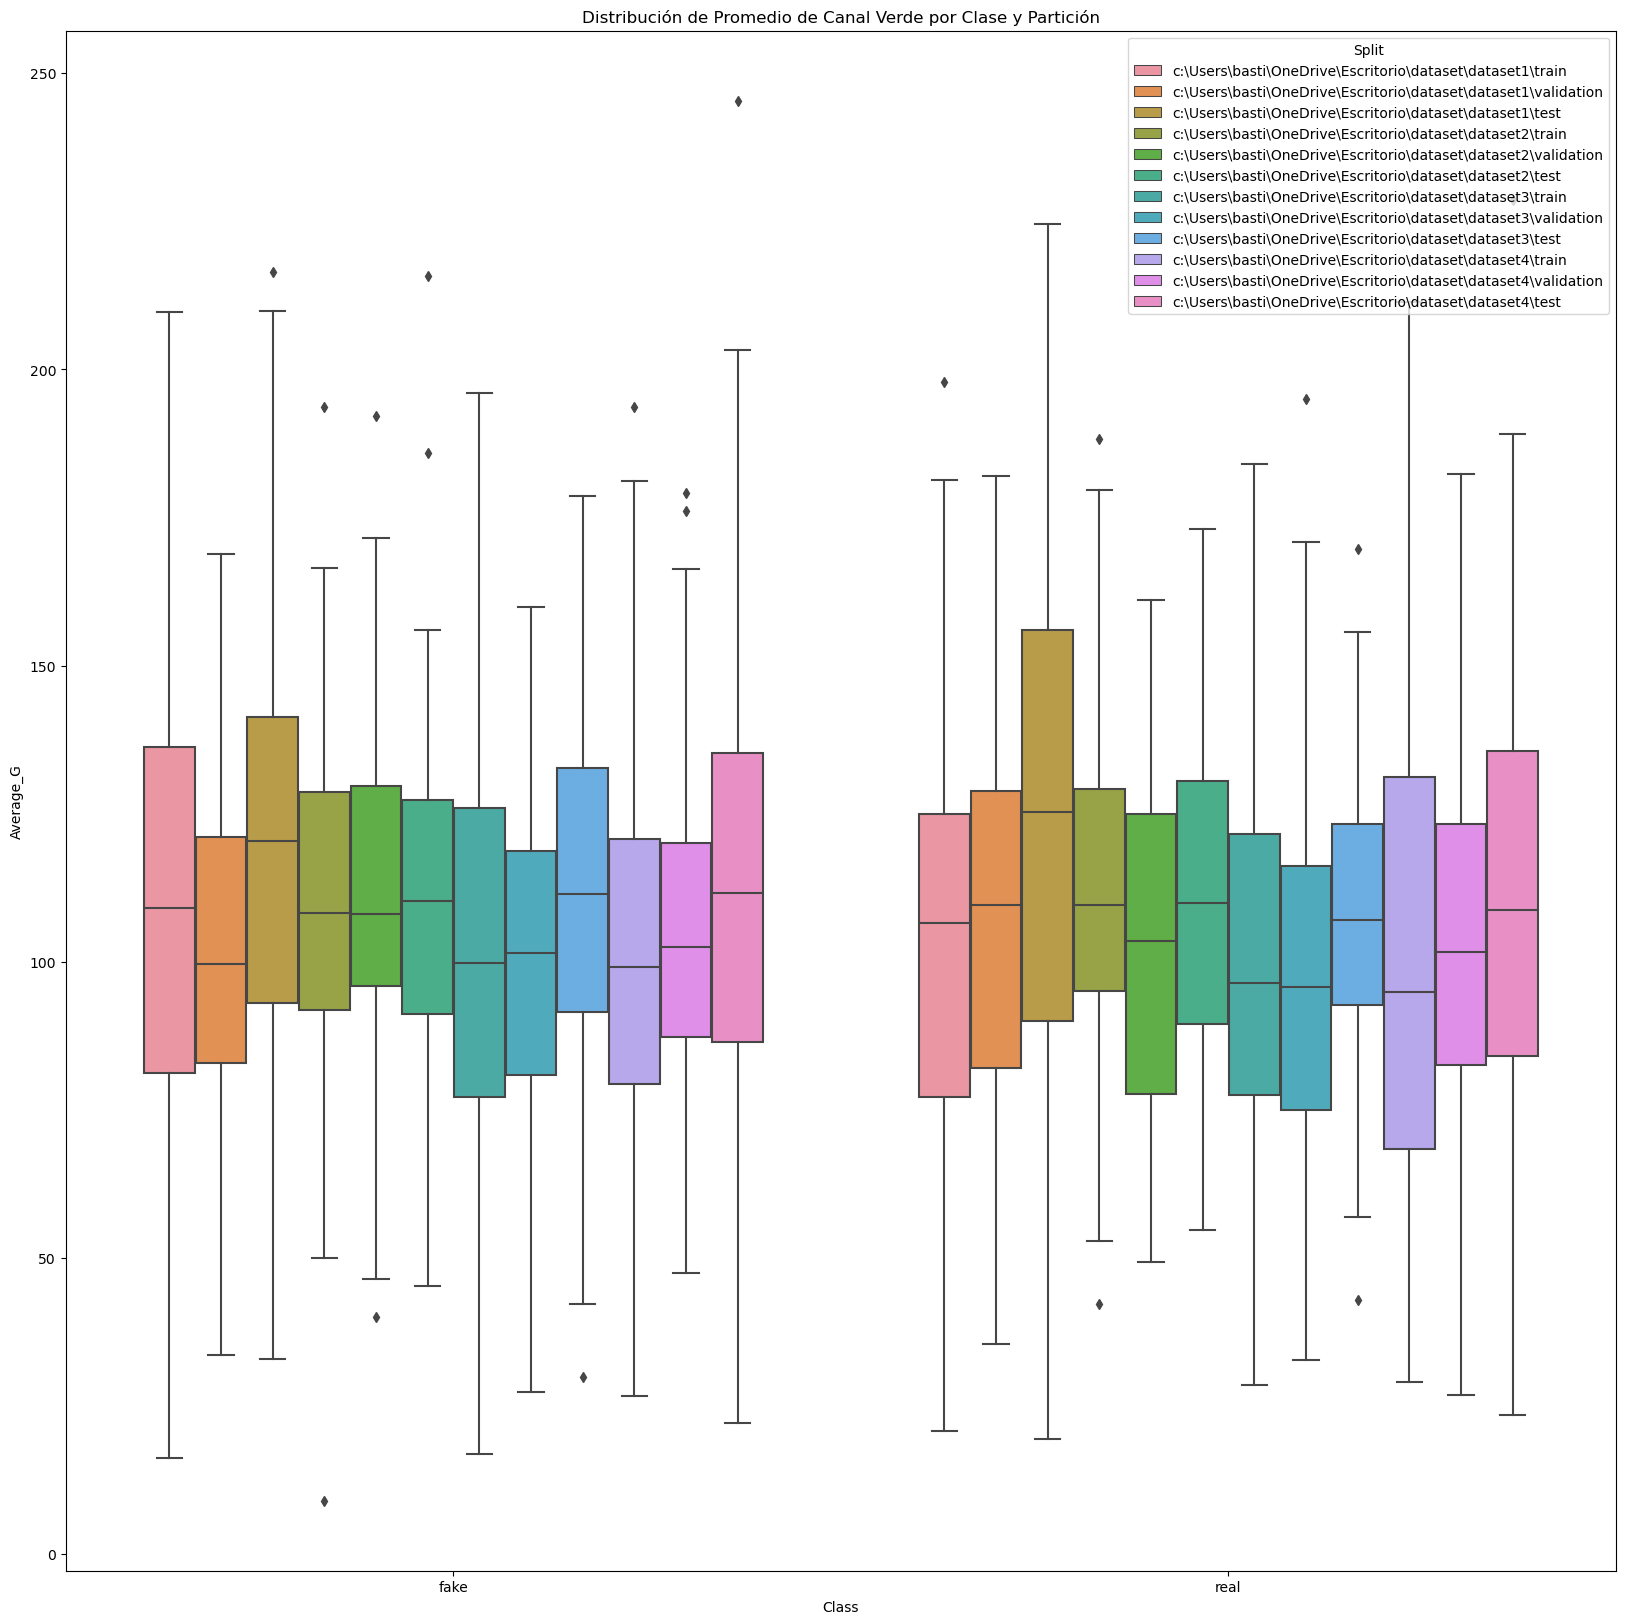

In [16]:
plt.figure(figsize=(20, 20)) 
sns.boxplot(x='Class', y='Average_G', hue='Split', data=df2)
plt.title("Distribución de Promedio de Canal Verde por Clase y Partición")
plt.show()

c:\Users\basti\miniconda3\envs\entorno\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\basti\miniconda3\envs\entorno\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\basti\miniconda3\envs\entorno\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\basti\miniconda3\envs\entorno\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

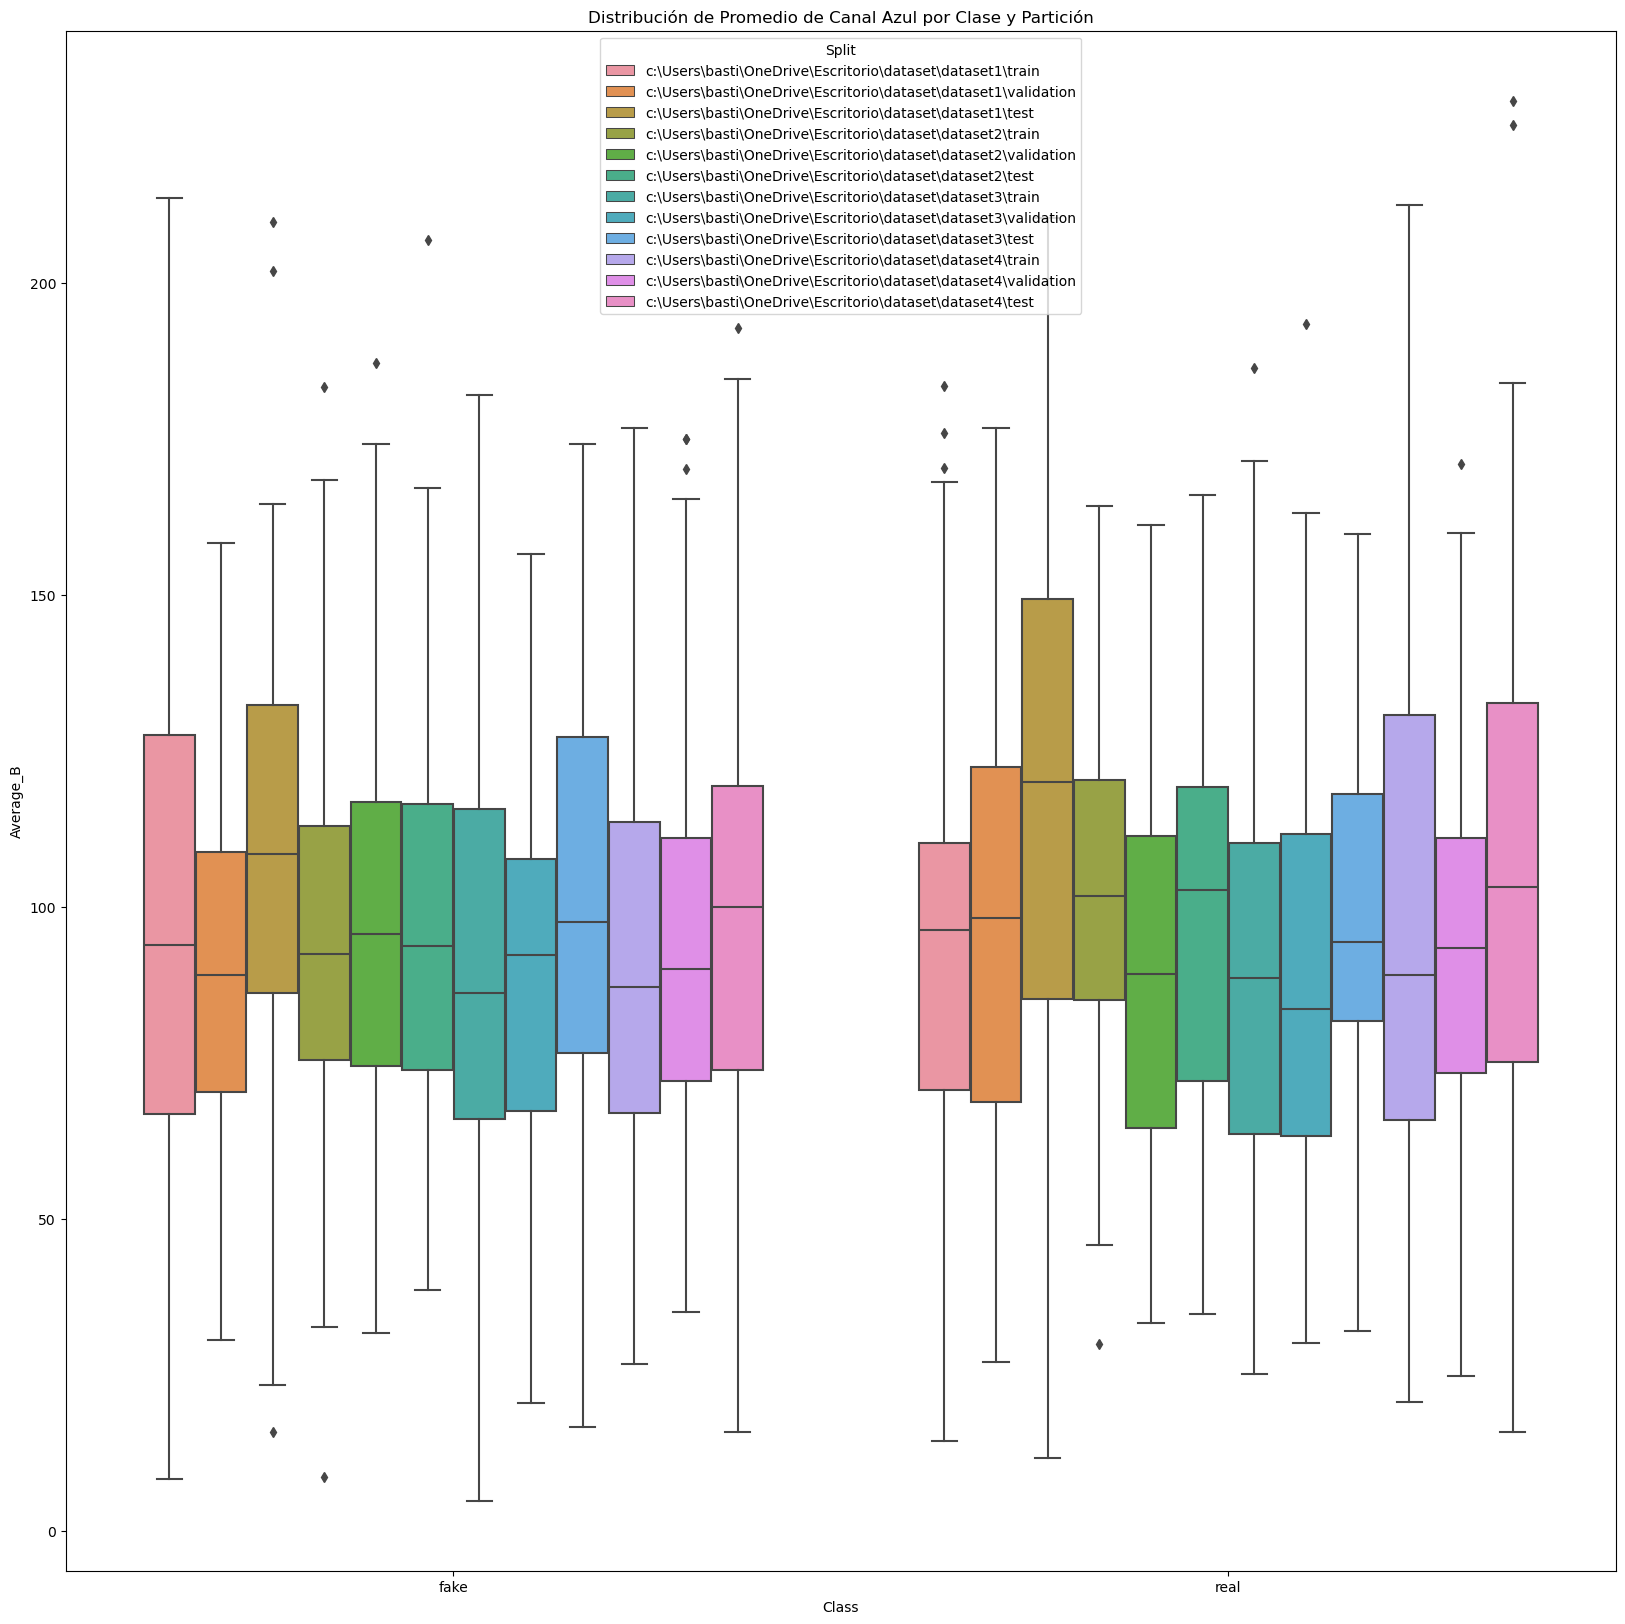

In [17]:
plt.figure(figsize=(20, 20)) 
sns.boxplot(x='Class', y='Average_B', hue='Split', data=df2)
plt.title("Distribución de Promedio de Canal Azul por Clase y Partición")
plt.show()

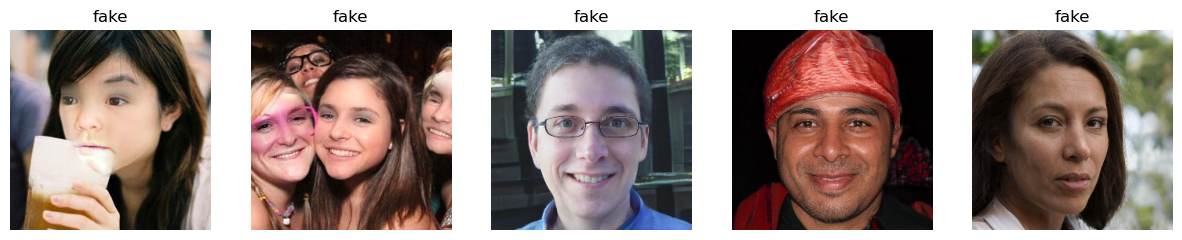

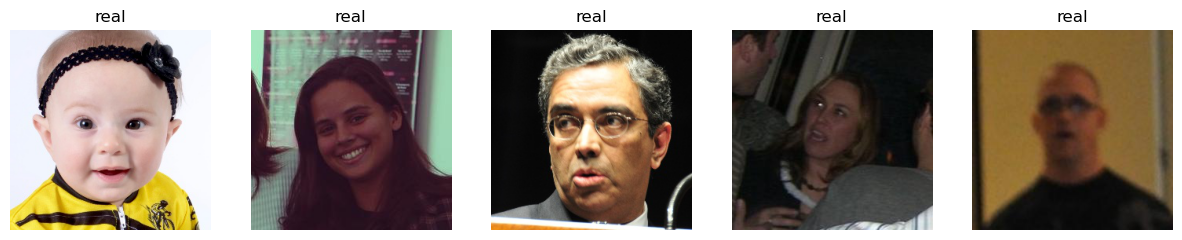

In [ ]:
def display_random_images(df, n=5):
    for cls in df['Class'].unique():
        sample = df[df['Class'] == cls].sample(n)
        plt.figure(figsize=(15, 5))
        for i, (_, row) in enumerate(sample.iterrows()):
            img_path = os.path.join(row['Directory'], row['Split'], row['Class'], row['Filename'])
            img = Image.open(img_path)
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.title(f"{row['Class']}")
            plt.axis('off')
        plt.show()
display_random_images(df, n=5)

In [13]:
fig = px.histogram(x=df["File_Size_MB"], nbins=50, title="Distribucion del tamaño de imagen")
fig.update_layout(
    xaxis_title="Tamaño (MB)",
    yaxis_title="Cantidad de imagenes",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()

In [ ]:
mean_color_distribution = np.mean(color_distributions_real, axis=0)
fig = go.Figure(
    go.Bar(x=np.arange(256), y=mean_color_distribution, name="Promedio de la distribucion de colores (real)")
)

fig.update_layout(
    title="Promedio de la distribucion de colores(real)",
    xaxis_title="Color Value",
    yaxis_title="Number of Pixels"
)

fig.show()

In [ ]:
mean_color_distribution = np.mean(color_distributions_fake, axis=0)
fig = go.Figure(
    go.Bar(x=np.arange(256), y=mean_color_distribution, name="Promedio de la distribucion de colores (fake)")
)

fig.update_layout(
    title="Promedio de la distribucion de colores(fake)",
    xaxis_title="Color Value",
    yaxis_title="Number of Pixels"
)

fig.show()